# Analisis Timeseries data Meteorologi dengan Matplotlib

Timeseries adalah analisis sekumpulan data pengamatan/observasi yang diurutkan berdasarkan waktu. Contoh : Timeseries data suhu perjam selama tahun 2023, Timeseries curah hujan harian DJF, dll.​

Karakteristik Utama : Urutan waktu, Interval waktu, Tren, Musiman, Cyclical​

Data yang digunakan : data_megaentry_2023.csv

## Plotting Parameter Cuaca setahun

### 1. Plotting Data Timeseries Td (Titik Embun) 2023

### Import Module

In [45]:
#Import module yang diperlukan
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import warnings
warnings.simplefilter("ignore", UserWarning)


### Load data csv

In [46]:
# Load data megaentry
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'TEMP DEWPOINT C TDTDTD'])

df

,DATA TIMESTAMP,TEMP DEWPOINT C TDTDTD
0,2023-01-01 00:00:00.0 +0:00,20.8
1,2023-01-01 01:00:00.0 +0:00,21.1
2,2023-01-01 02:00:00.0 +0:00,21.2
3,2023-01-01 03:00:00.0 +0:00,21.0
4,2023-01-01 04:00:00.0 +0:00,21.1
...,...,...
8755,2023-12-31 19:00:00.0 +0:00,22.1
8756,2023-12-31 20:00:00.0 +0:00,22.8
8757,2023-12-31 21:00:00.0 +0:00,22.6
8758,2023-12-31 22:00:00.0 +0:00,23.8


### Konversi kolom 'DATA TIMESTAMP' ke format datetime

In [47]:
# Convert kolom 'DATA TIMESTAMP' column to datetime format
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])

df['DATA TIMESTAMP']

0      2023-01-01 00:00:00+00:00
1      2023-01-01 01:00:00+00:00
2      2023-01-01 02:00:00+00:00
3      2023-01-01 03:00:00+00:00
4      2023-01-01 04:00:00+00:00
                  ...           
8755   2023-12-31 19:00:00+00:00
8756   2023-12-31 20:00:00+00:00
8757   2023-12-31 21:00:00+00:00
8758   2023-12-31 22:00:00+00:00
8759   2023-12-31 23:00:00+00:00
Name: DATA TIMESTAMP, Length: 8760, dtype: datetime64[ns, UTC]

### Ekstrak data Td dan konversi ke numerik, dan handling error

In [48]:
# Extract the dewpoint temperature (Td) and convert it to numeric, handling errors
df['TEMP DEWPOINT C TD'] = pd.to_numeric(df['TEMP DEWPOINT C TDTDTD'], errors='coerce')
df['TEMP DEWPOINT C TD']

0       20.8
1       21.1
2       21.2
3       21.0
4       21.1
        ... 
8755    22.1
8756    22.8
8757    22.6
8758    23.8
8759    24.1
Name: TEMP DEWPOINT C TD, Length: 8760, dtype: float64

### Plotting timeseries

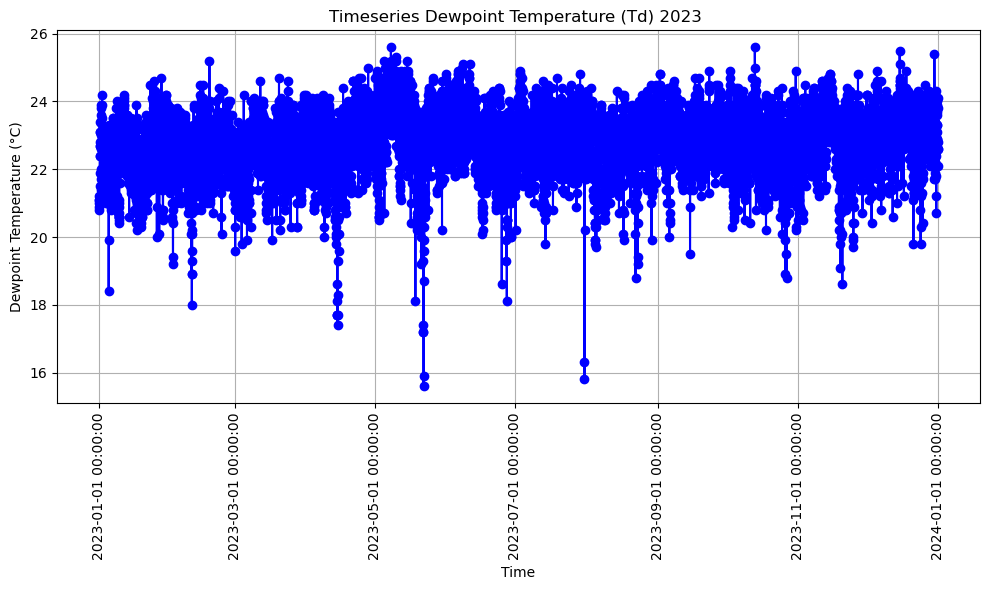

In [49]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df['DATA TIMESTAMP'], df['TEMP DEWPOINT C TDTDTD'], marker='o', linestyle='-', color='blue')

# Formatting the plot
plt.title('Timeseries Dewpoint Temperature (Td) 2023 ')
plt.xlabel('Time')
plt.ylabel('Dewpoint Temperature (°C)')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(DateFormatter("%Y-%m-%d %H:%M:%S"))

# Show grid
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

## 2. Plotting Seasonal Td Periode MJJ (May Juni Juli) 2023 

### Filter Seasonal Dewpoint Temperature MJJ

In [50]:
# Filter data untuk MJJ ( May, Juni, and Juli)
df_mjj = df[df['DATA TIMESTAMP'].dt.month.isin([5, 6, 7])]

df_mjj

,DATA TIMESTAMP,TEMP DEWPOINT C TDTDTD,TEMP DEWPOINT C TD
2880,2023-05-01 00:00:00+00:00,24.1,24.1
2881,2023-05-01 01:00:00+00:00,23.7,23.7
2882,2023-05-01 02:00:00+00:00,23.2,23.2
2883,2023-05-01 03:00:00+00:00,23.0,23.0
2884,2023-05-01 04:00:00+00:00,23.9,23.9
...,...,...,...
5083,2023-07-31 19:00:00+00:00,22.7,22.7
5084,2023-07-31 20:00:00+00:00,23.4,23.4
5085,2023-07-31 21:00:00+00:00,23.0,23.0
5086,2023-07-31 22:00:00+00:00,23.1,23.1


### Plotting Seasonal 

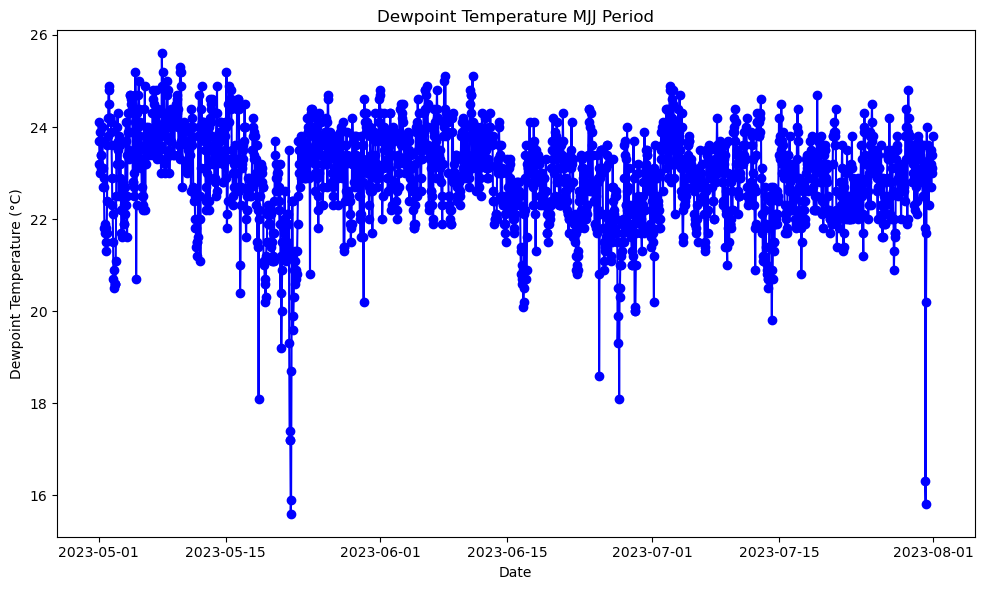

In [51]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_mjj['DATA TIMESTAMP'], df_mjj['TEMP DEWPOINT C TDTDTD'], marker='o', linestyle='-', color='blue')

plt.title('Dewpoint Temperature MJJ Period')
plt.xlabel('Date')
plt.ylabel('Dewpoint Temperature (°C)')

plt.tight_layout()
plt.show()

## Latihan 1
Buatlah Plot Seasonal Parameter Temperatur pada periode JJA (Juni Juli Agustus) 2023 dengan menggunakan data yang sama dengan sebelumnya

## 3. Plotting Diurnal Td pada tanggal 22 Mei 2023

### Filter Diurnal Dewpoint Temperature (Td)

In [52]:
# Filter data for May 22, 2023
df_may22 = df[(df['DATA TIMESTAMP'].dt.year == 2023) & 
              (df['DATA TIMESTAMP'].dt.month == 5) & 
              (df['DATA TIMESTAMP'].dt.day == 22)]

### Plotting Diurnal

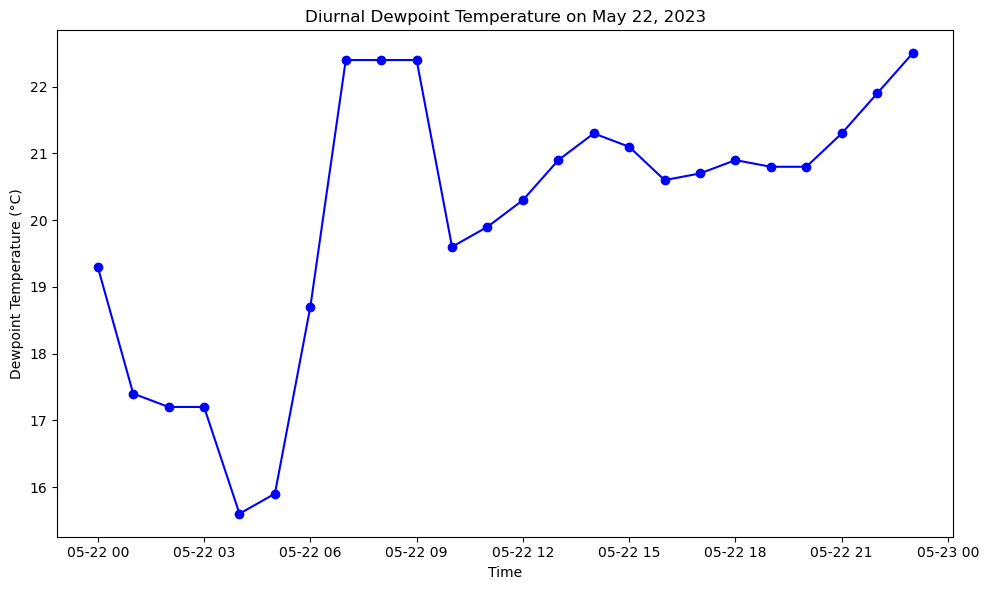

In [53]:
# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df_may22['DATA TIMESTAMP'], df_may22['TEMP DEWPOINT C TDTDTD'], marker='o', linestyle='-', color='blue')

plt.title('Diurnal Dewpoint Temperature on May 22, 2023')
plt.xlabel('Time')
plt.ylabel('Dewpoint Temperature (°C)')

plt.tight_layout()
plt.show()

## Latihan 2
Buatlah Plot Diurnal Parameter Td pada tanggal 22 Mei 2023 dengan menggunakan data yang sama dengan sebelumnya

## Plotting Windrose

## 1. Plot Windrose Tahunan

### Import Module

In [54]:
#Import module yang diperlukan
import pandas as pd
from windrose import WindroseAxes
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)


### Load Data Csv

In [55]:
# Load data
df = pd.read_csv('data_megaentry_2023.csv', usecols=['WIND DIR DEG DD', 'WIND SPEED FF'])
df

,WIND DIR DEG DD,WIND SPEED FF
0,280,4
1,190,5
2,280,4
3,290,6
4,300,9
...,...,...
8755,320,2
8756,120,1
8757,350,2
8758,130,1


## Cleaning, Filtering, dan Menghilangkan missing data

In [56]:
# Proses pembersihan data:  menghilangkan missing atau nilai non-numeric
df = df.dropna()
df['WIND DIR DEG DD'] = pd.to_numeric(df['WIND DIR DEG DD'], errors='coerce')
df['WIND SPEED FF'] = pd.to_numeric(df['WIND SPEED FF'], errors='coerce')
df = df.dropna()

# Exclude rows where wind direction is 0 degrees
df = df[df['WIND DIR DEG DD'] > 0]

# Convert wind direction and speed to numpy arrays
wind_direction = df['WIND DIR DEG DD'].values
wind_speed = df['WIND SPEED FF'].values


## Plotting Windrose

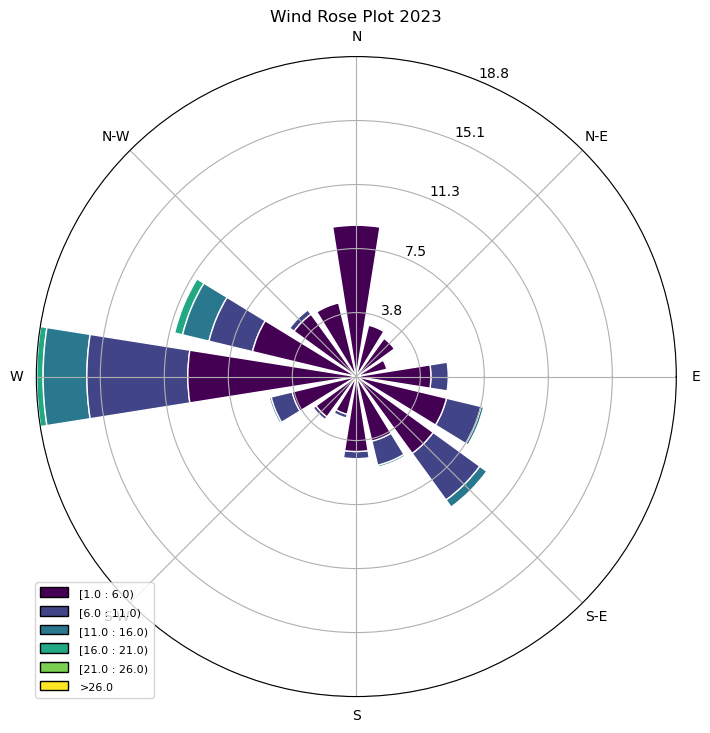

In [57]:
# Create a wind rose plot
fig = plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax(fig=fig)
ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor='white')
ax.set_legend()

plt.title('Wind Rose Plot 2023')
plt.show()

## Plotting Trend Temperature 

### Import Module

In [58]:
#Import module yang dibutuhkan
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import warnings
warnings.simplefilter("ignore", UserWarning)

### Load data csv

In [59]:
# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'TEMP DRYBULB C TTTTTT'])
df

,DATA TIMESTAMP,TEMP DRYBULB C TTTTTT
0,2023-01-01 00:00:00.0 +0:00,29.7
1,2023-01-01 01:00:00.0 +0:00,29.3
2,2023-01-01 02:00:00.0 +0:00,30.6
3,2023-01-01 03:00:00.0 +0:00,31.0
4,2023-01-01 04:00:00.0 +0:00,30.4
...,...,...
8755,2023-12-31 19:00:00.0 +0:00,25.6
8756,2023-12-31 20:00:00.0 +0:00,25.7
8757,2023-12-31 21:00:00.0 +0:00,25.8
8758,2023-12-31 22:00:00.0 +0:00,27.1


### Convert and extract month data dari 'DATA TIMESTAMP'

In [60]:
# Convert the 'DATA TIMESTAMP' column to datetime format and extract month
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])
df['Month'] = df['DATA TIMESTAMP'].dt.month


### Filter Seasonal data MAM, JJA, SON

In [61]:
# Filter data for each season
mam = df[df['Month'].isin([3, 4, 5])]
jja = df[df['Month'].isin([6, 7, 8])]
son = df[df['Month'].isin([9, 10, 11])]

### Pendefinisian Function untuk Plotting dan Looping

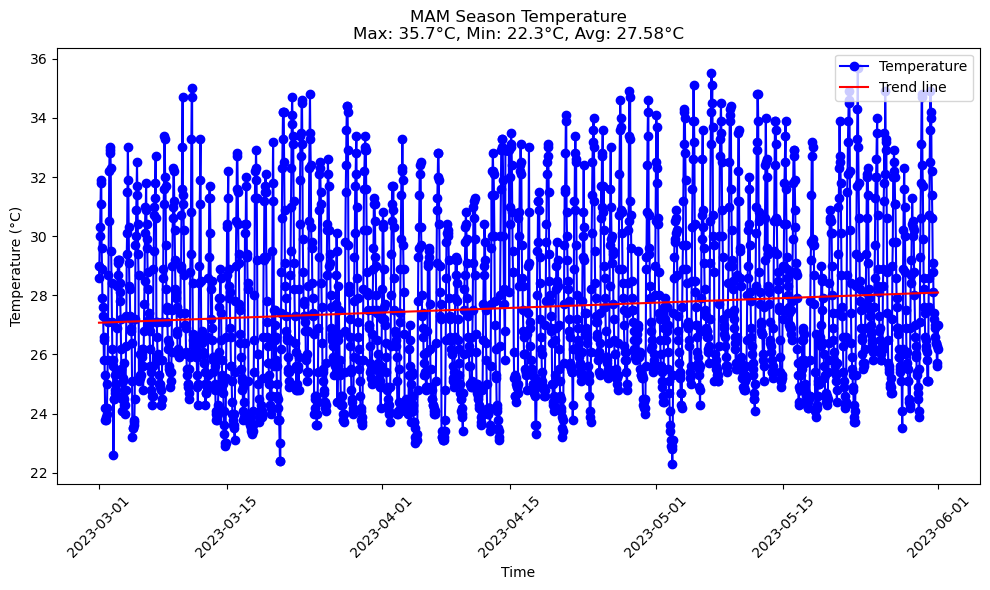

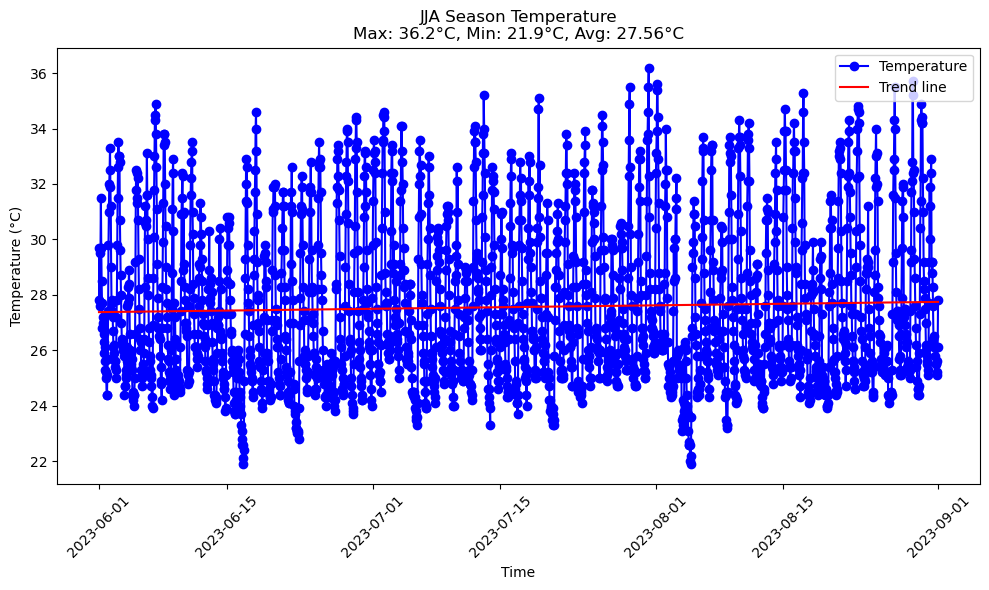

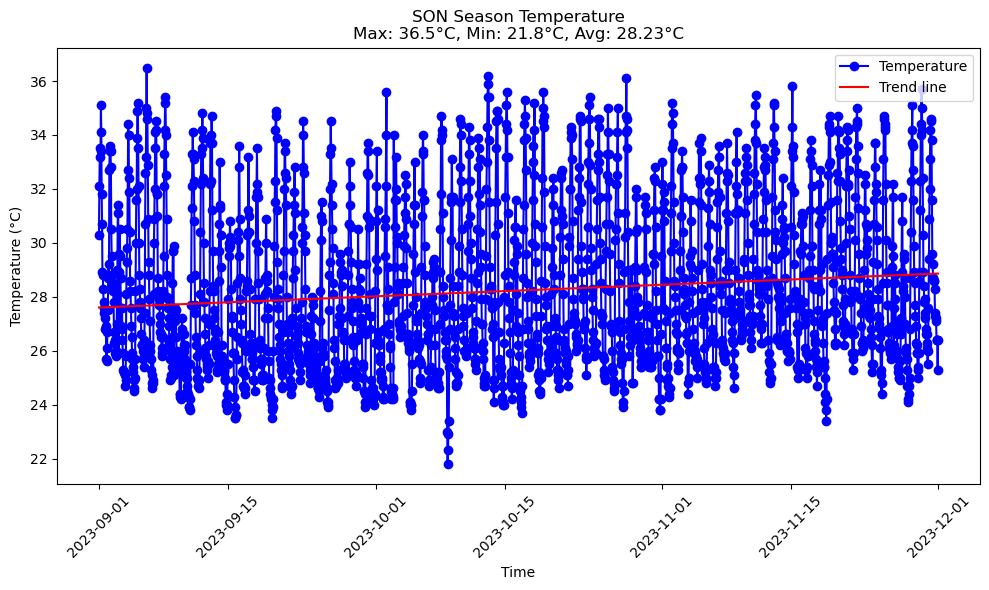

In [62]:
# Function to plot each season
def plot_season(season_df, season_name):
    plt.figure(figsize=(10, 6))
    plt.plot(season_df['DATA TIMESTAMP'], season_df['TEMP DRYBULB C TTTTTT'], label='Temperature', marker='o', linestyle='-', color='blue')
    
    # Calculate and plot trend line
    x = np.arange(len(season_df))
    y = season_df['TEMP DRYBULB C TTTTTT']
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot(season_df['DATA TIMESTAMP'], intercept + slope*x, 'r', label='Trend line')
    
    # Display properties
    max_temp = y.max()
    min_temp = y.min()
    avg_temp = y.mean()
    plt.title(f'{season_name} Season Temperature\nMax: {max_temp}°C, Min: {min_temp}°C, Avg: {avg_temp:.2f}°C')
    plt.xlabel('Time')
    plt.ylabel('Temperature (°C)')
    plt.legend(loc='upper right')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot each season
plot_season(mam, 'MAM')
plot_season(jja, 'JJA')
plot_season(son, 'SON')

## Latihan 3
Buatlah Plot Seasonal Windrose MAM, JJA dan SON 2023 dengan menggunakan data yang sama dengan sebelumnya

## Plotting Monthly Average Temperature

### Import Module

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import warnings
warnings.simplefilter("ignore", UserWarning)

### Load Data CSV

In [64]:
# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'TEMP DRYBULB C TTTTTT', 'TEMP MAX C TXTXTX', 'TEMP MIN C TNTNTN'])

### Konversi kolom 'DATA TIMESTAMP' menjadi format datetime, ekstrak data dan kalkulasi statistik bulanan

In [65]:
# Convert the 'DATA TIMESTAMP' column to datetime format
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])

# Extract month and hour from 'DATA TIMESTAMP'
df['Month'] = df['DATA TIMESTAMP'].dt.month
df['Hour'] = df['DATA TIMESTAMP'].dt.hour

# Ensure temperature columns are numeric
df['TEMP DRYBULB C TTTTTT'] = pd.to_numeric(df['TEMP DRYBULB C TTTTTT'], errors='coerce')
df['TEMP MAX C TXTXTX'] = pd.to_numeric(df['TEMP MAX C TXTXTX'], errors='coerce')
df['TEMP MIN C TNTNTN'] = pd.to_numeric(df['TEMP MIN C TNTNTN'], errors='coerce')

# Group by month and calculate statistics for dry bulb temperature
monthly_stats = df.groupby('Month')['TEMP DRYBULB C TTTTTT'].agg(['mean', 'max', 'min']).reset_index()

### Plotting monthly averaged

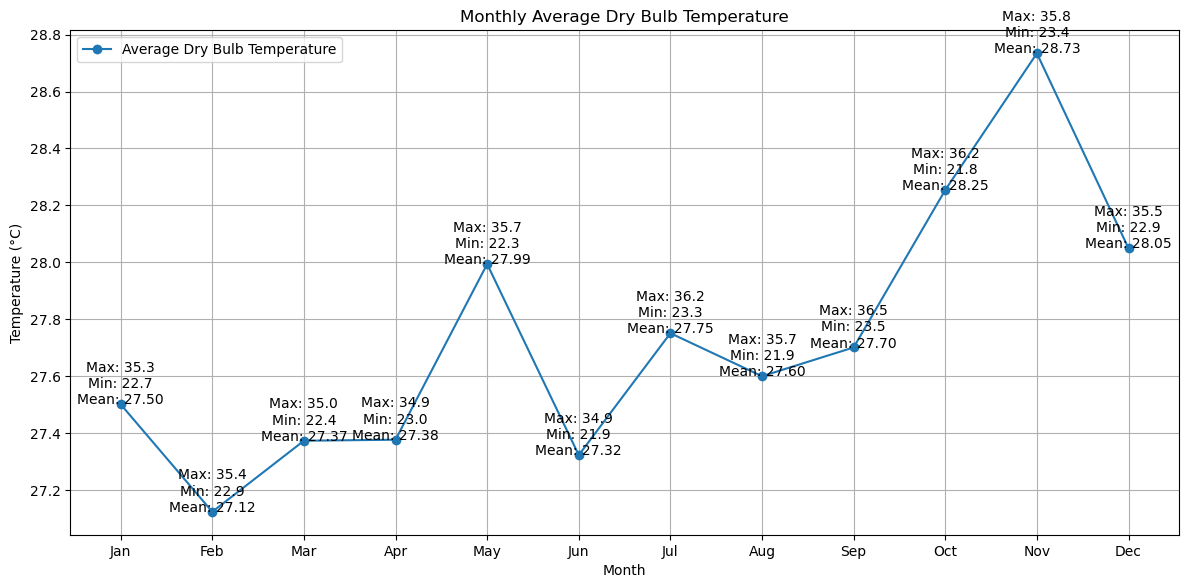

In [66]:
plt.figure(figsize=(12, 6))

# Plotting the average dry bulb temperature
plt.plot(monthly_stats['Month'], monthly_stats['mean'], label='Average Dry Bulb Temperature', marker='o', linestyle='-')

# Adding statistical annotations
for i, row in monthly_stats.iterrows():
    plt.text(row['Month'], row['mean'], f"Max: {row['max']}\nMin: {row['min']}\nMean: {row['mean']:.2f}", ha='center')

plt.title('Monthly Average Dry Bulb Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Latihan 4
Buatlah Plot Monthly average parameter tekanan udara 2023 dengan menggunakan data yang sama dengan sebelumnya

## Plotting Daily Accumulation Hujan dan Kategorisasi

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calendar
import warnings
warnings.simplefilter("ignore", UserWarning)

### Load data CSV

In [68]:
# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'RAINFALL LAST MM'])

### Konversi kolom 'DATA TIMESTAMP' menjadi format datetime, ekstrak data dan kalkulasi akumulasi hujan 

In [69]:
# Convert 'DATA TIMESTAMP' to datetime and extract month and day
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])
df['Month'] = df['DATA TIMESTAMP'].dt.month
df['Day'] = df['DATA TIMESTAMP'].dt.day

# Replace 8888 with 0 and convert to numeric
df['RAINFALL LAST MM'] = df['RAINFALL LAST MM'].replace(8888, 0)
df['RAINFALL LAST MM'] = pd.to_numeric(df['RAINFALL LAST MM'], errors='coerce').fillna(0)

### Membuat Fungsi Plotting dan Looping dan kategorisasi

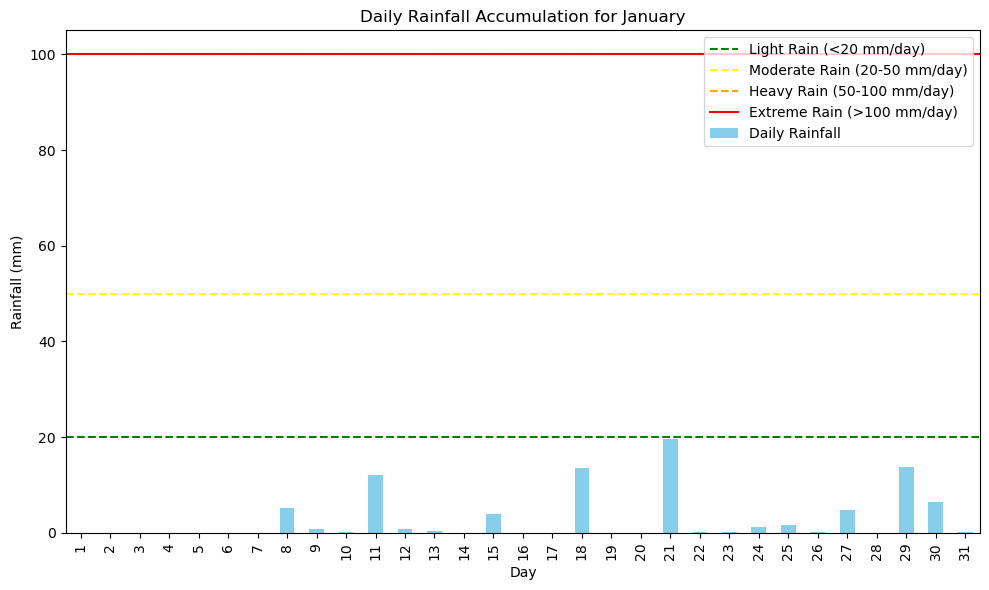

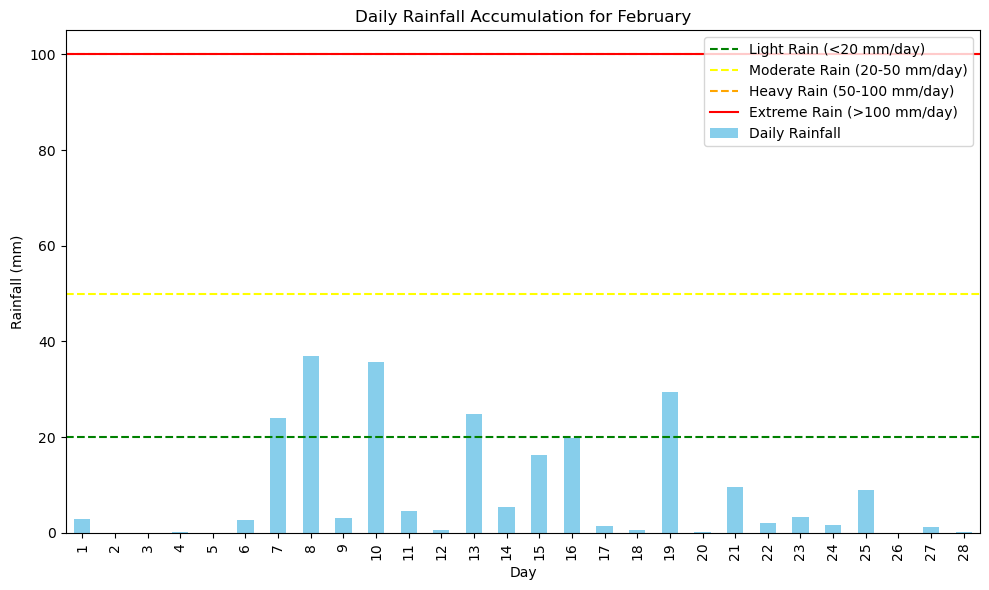

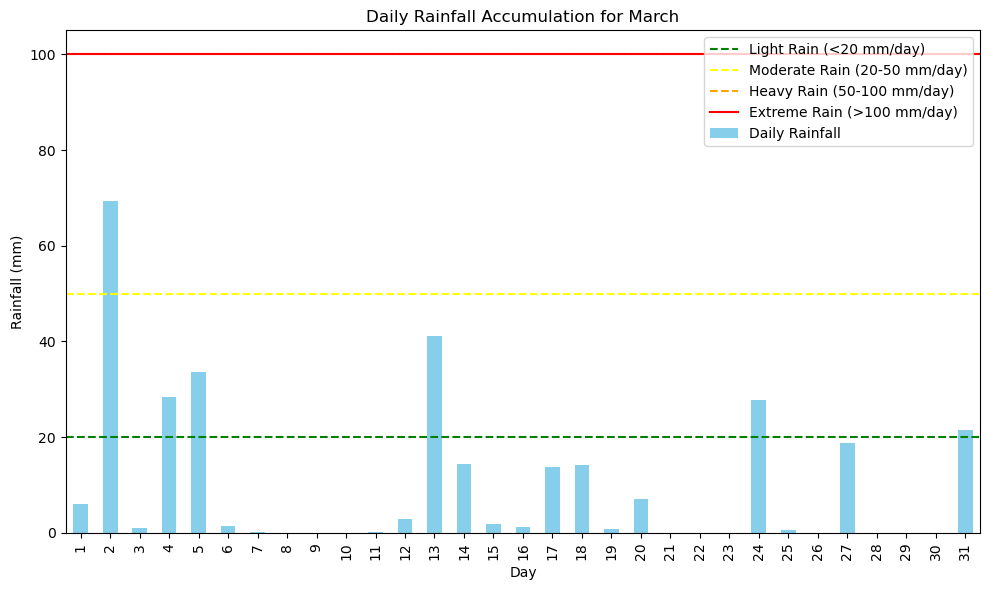

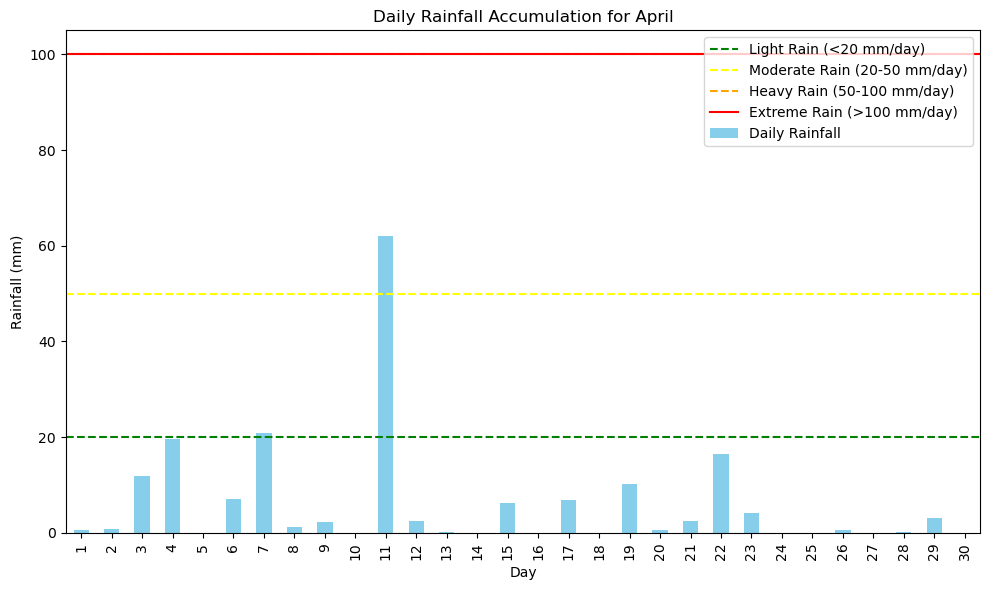

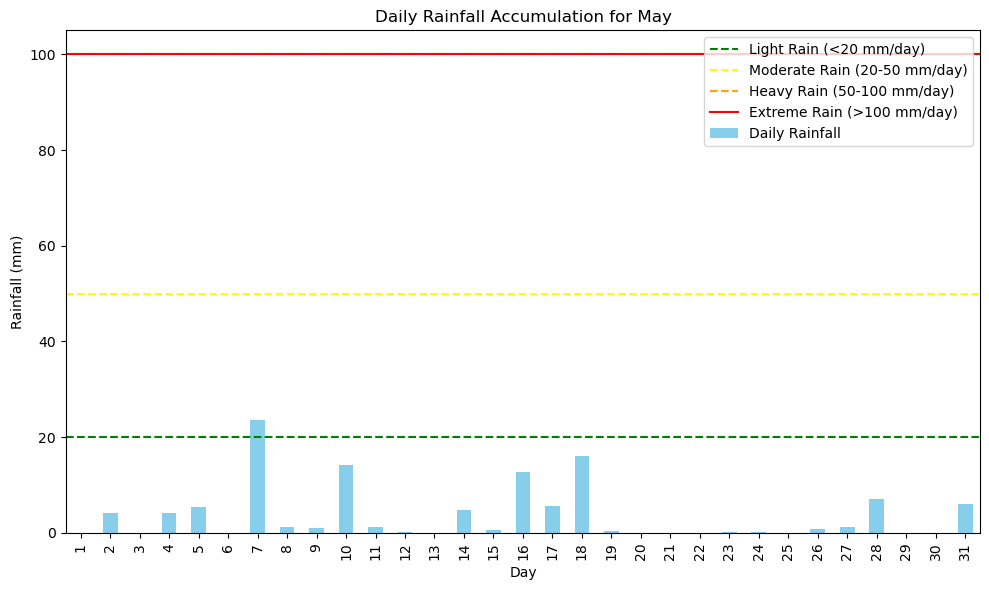

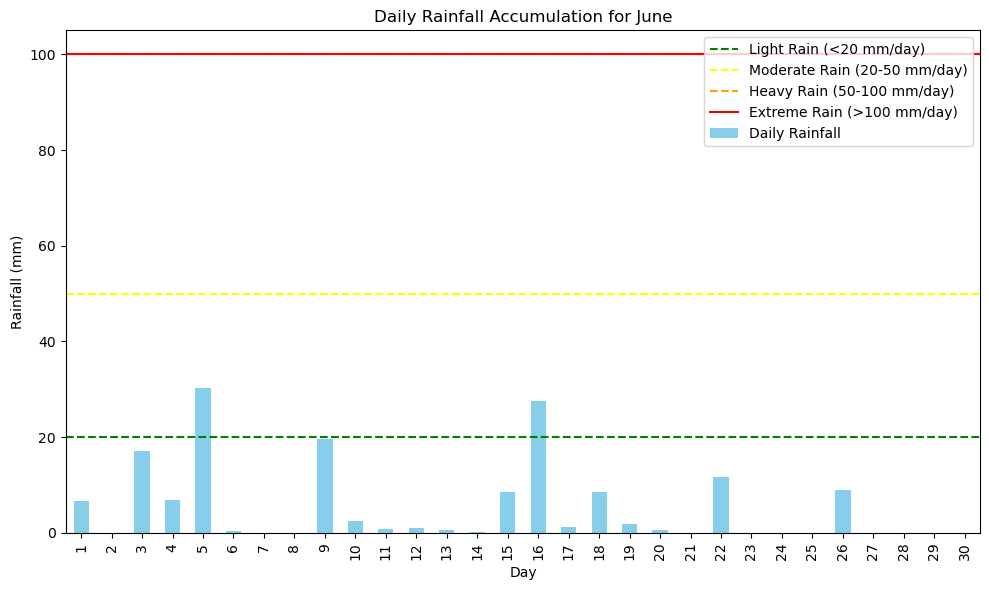

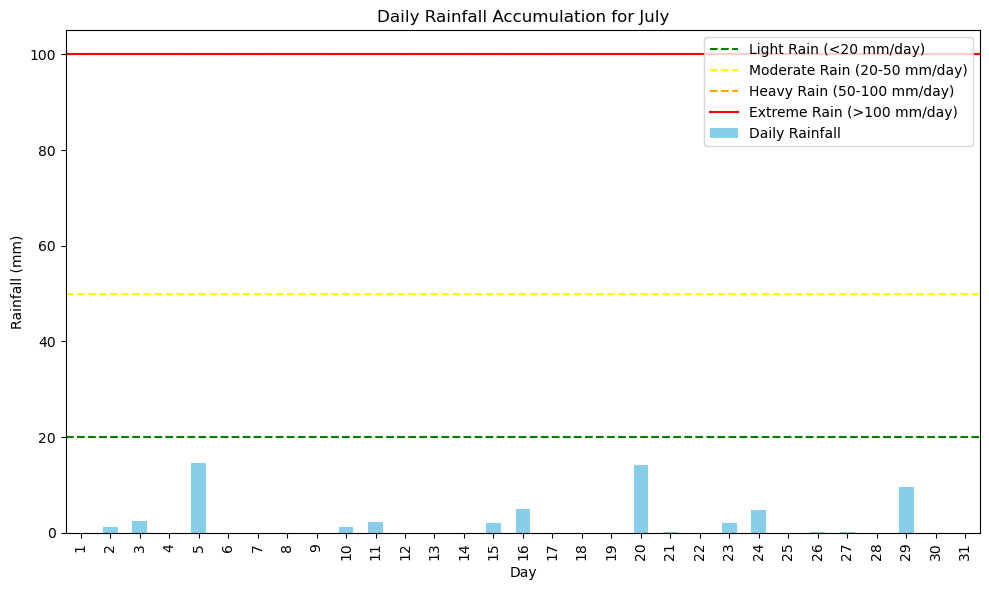

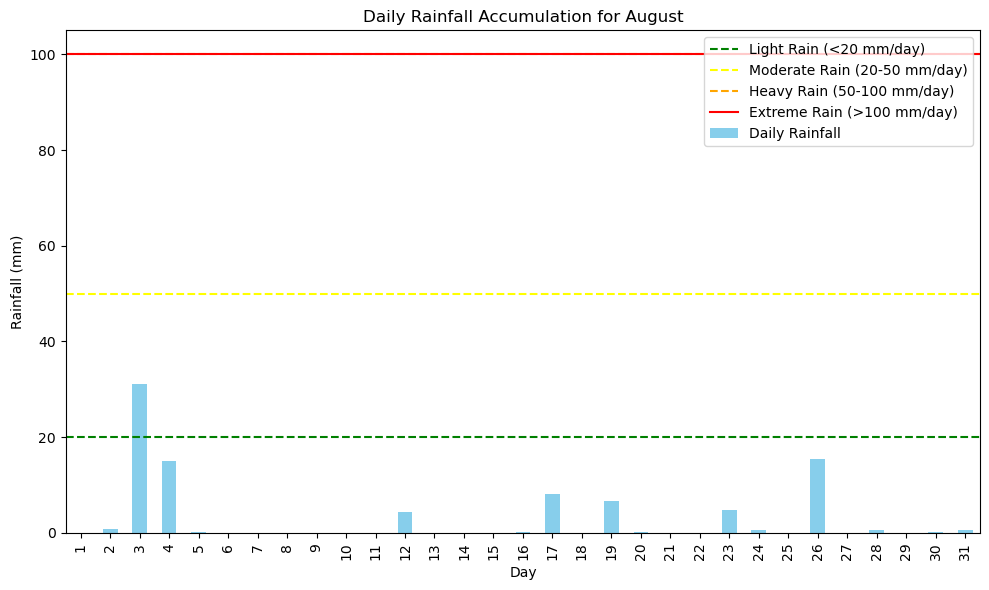

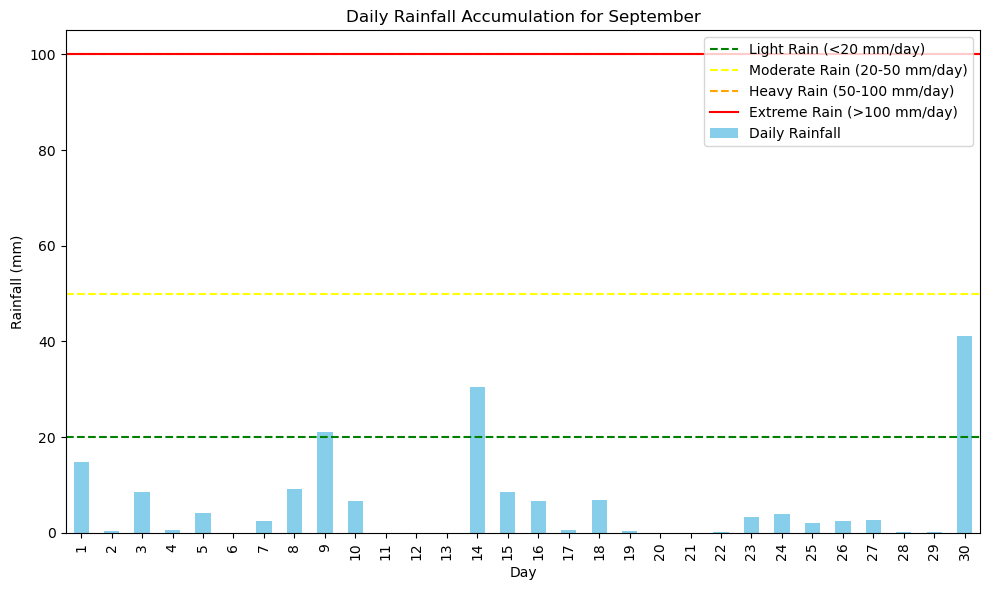

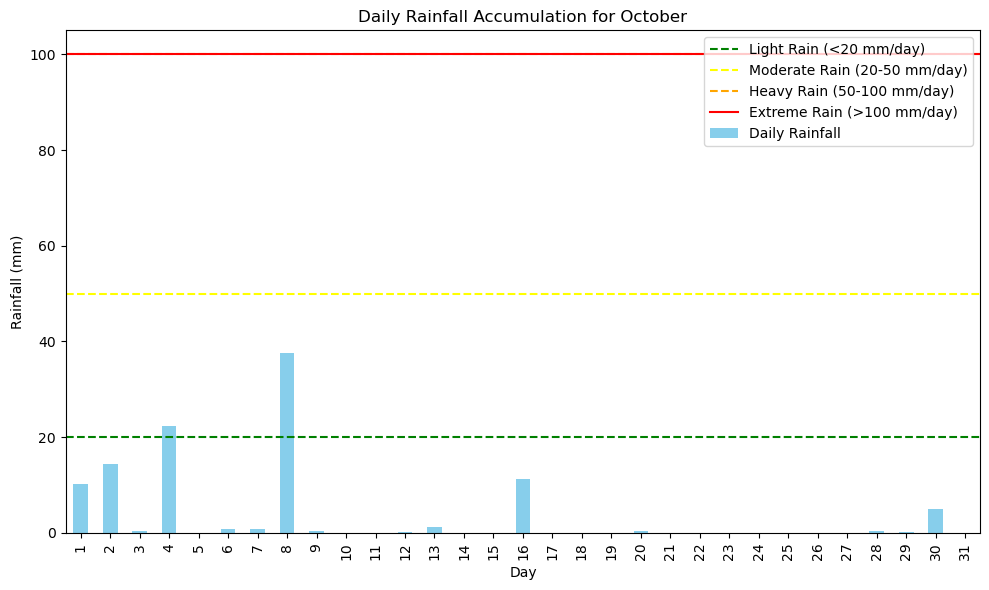

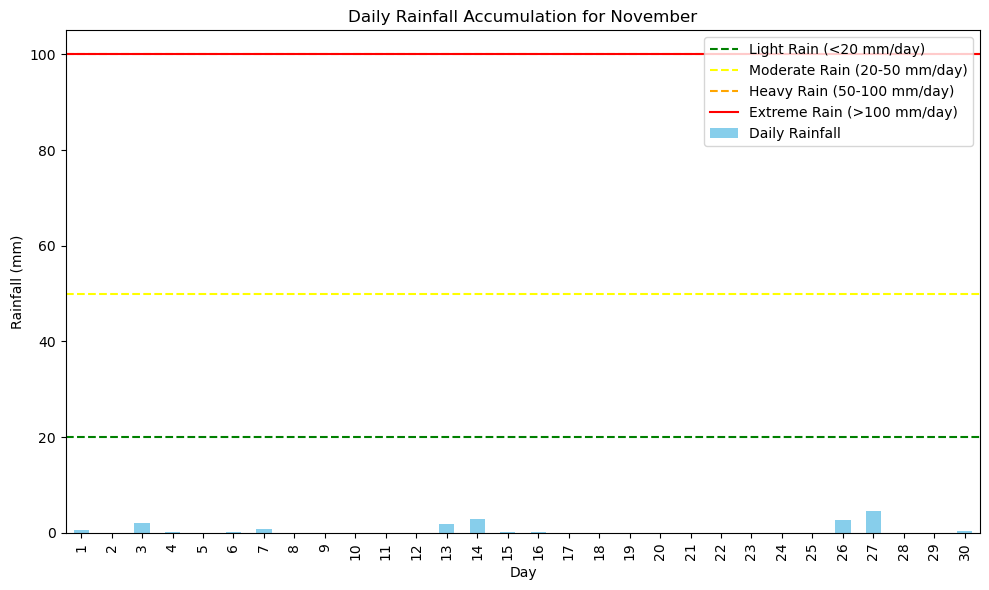

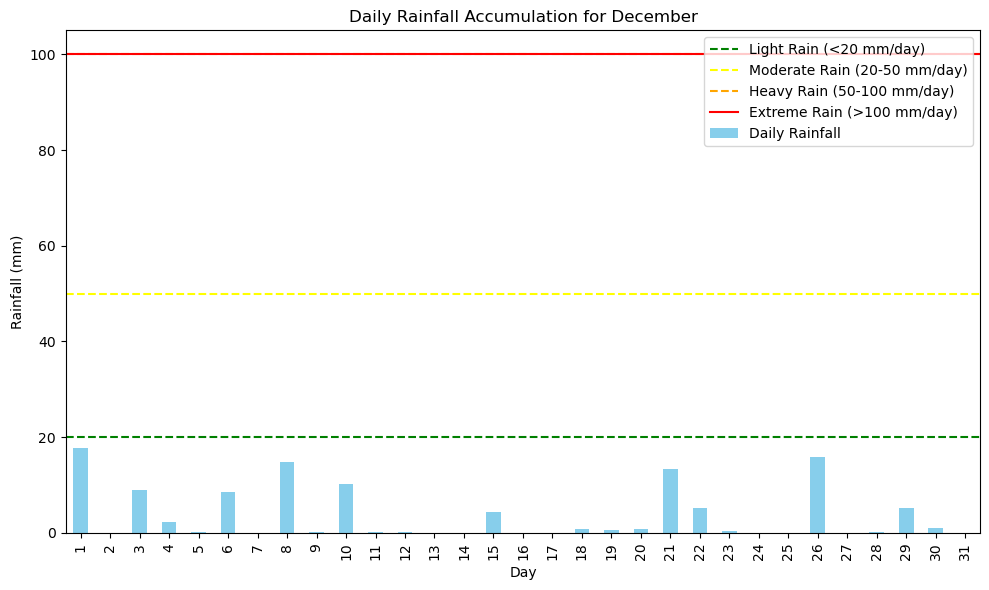

In [70]:
# Function to plot daily rainfall for a given month
def plot_daily_rainfall_for_month(month_number):
    # Filter data for the specified month
    monthly_data = df[df['Month'] == month_number]
    
    # Accumulate daily rainfall
    daily_rainfall = monthly_data.groupby('Day')['RAINFALL LAST MM'].sum()
    
    # Plotting
    plt.figure(figsize=(10, 6))
    daily_rainfall.plot(kind='bar', color='skyblue', label='Daily Rainfall')
    
    # Adding horizontal lines for rainfall classification
    plt.axhline(20, color='green', linestyle='--', label='Light Rain (<20 mm/day)')
    plt.axhline(50, color='yellow', linestyle='--', label='Moderate Rain (20-50 mm/day)')
    plt.axhline(100, color='orange', linestyle='--', label='Heavy Rain (50-100 mm/day)')
    plt.axhline(100, color='red', linestyle='-', label='Extreme Rain (>100 mm/day)')
    
    plt.title(f'Daily Rainfall Accumulation for {calendar.month_name[month_number]}')
    plt.xlabel('Day')
    plt.ylabel('Rainfall (mm)')
    plt.legend(loc='upper right')
    plt.tight_layout()
    
    # Show the plot
    plt.show()

# Plot daily rainfall for each month
for month in range(1, 13):
    plot_daily_rainfall_for_month(month)

## Latihan 5
Buatlah Plot Kategorisasi ENSO dengan menggunakan data indeks nino 3.4 yang terdapat di github

### Plotting Daily accumulation hujan VS hujan 3 jam

### Import module yang diperlukan

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore", UserWarning)

### Konversi kolom 'DATA TIMESTAMP' menjadi format datetime, ekstrak data dan kalkulasi akumulasi hujan harian dan curah hujan per 3 jam

In [72]:
# Convert 'DATA TIMESTAMP' to datetime and filter for March 2, 2023
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])
df = df[(df['DATA TIMESTAMP'] >= '2023-03-02 00:00:00') & (df['DATA TIMESTAMP'] <= '2023-03-02 23:59:59')]

# Replace 8888 with 0 and convert to numeric
df['RAINFALL LAST MM'] = df['RAINFALL LAST MM'].replace(8888, 0)
df['RAINFALL LAST MM'] = pd.to_numeric(df['RAINFALL LAST MM'], errors='coerce').fillna(0)

# Calculate the cumulative sum of rainfall
df['CUMULATIVE RAINFALL'] = df['RAINFALL LAST MM'].cumsum()

### Plotting 

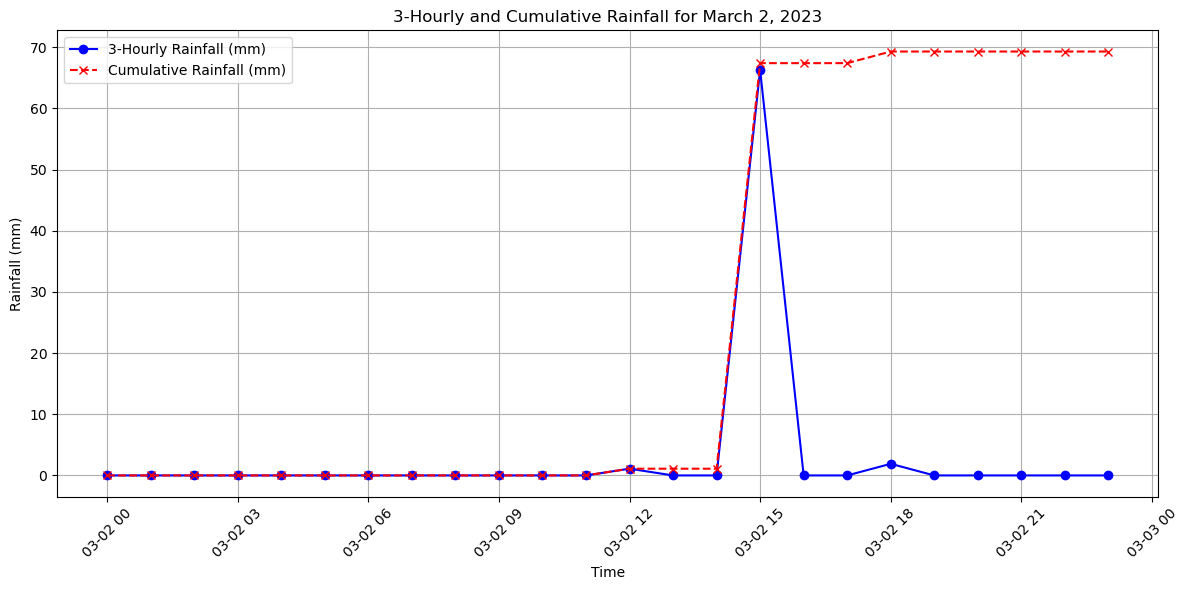

In [73]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot 3-hourly rainfall data
plt.plot(df['DATA TIMESTAMP'], df['RAINFALL LAST MM'], label='3-Hourly Rainfall (mm)', marker='o', linestyle='-', color='blue')

# Plot cumulative rainfall data
plt.plot(df['DATA TIMESTAMP'], df['CUMULATIVE RAINFALL'], label='Cumulative Rainfall (mm)', marker='x', linestyle='--', color='red')

# Formatting the plot
plt.title('3-Hourly and Cumulative Rainfall for March 2, 2023')
plt.xlabel('Time')
plt.ylabel('Rainfall (mm)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()

## Plotting Monthly Accumulation Hujan

### Ekstrak data monthly accumulation hujan 

In [84]:
# Load the dataset
df = pd.read_csv('data_megaentry_2023.csv', usecols=['DATA TIMESTAMP', 'RAINFALL LAST MM'])

# Convert 'DATA TIMESTAMP' to datetime format
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP'])

# Extract month from 'DATA TIMESTAMP'
df['Month'] = df['DATA TIMESTAMP'].dt.month

# Replace 8888 with 0 in 'RAINFALL LAST MM'
df['RAINFALL LAST MM'] = df['RAINFALL LAST MM'].replace(8888, 0)

# Convert 'RAINFALL LAST MM' to numeric, just in case it's not
df['RAINFALL LAST MM'] = pd.to_numeric(df['RAINFALL LAST MM'], errors='coerce').fillna(0)

# Group by month and sum the rainfall
monthly_rainfall = df.groupby('Month')['RAINFALL LAST MM'].sum()


### Plotting 

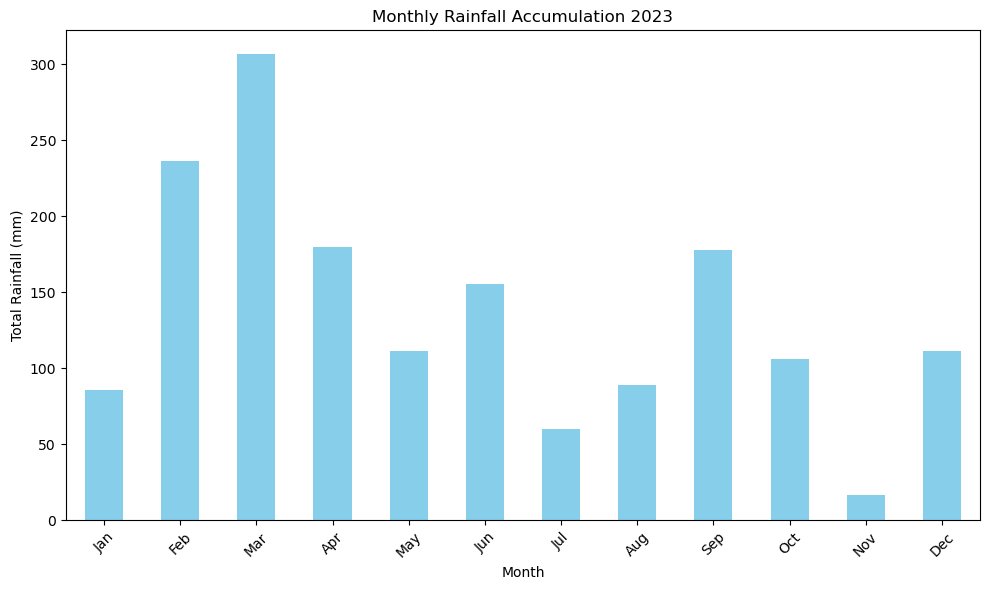

In [85]:
# Plotting
plt.figure(figsize=(10, 6))
monthly_rainfall.plot(kind='bar', color='skyblue')
plt.title('Monthly Rainfall Accumulation 2023')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

## Menemukan List Kejadian Hujan Harian berdasarkan kategori 

### Ekstrak data tanggal daily accumulation hujan dan kategorisasi hujan 

In [86]:
# Convert 'DATA TIMESTAMP' to datetime and extract date (without time)
df['DATA TIMESTAMP'] = pd.to_datetime(df['DATA TIMESTAMP']).dt.date

# Replace 8888 with 0 in 'RAINFALL LAST MM'
df['RAINFALL LAST MM'] = df['RAINFALL LAST MM'].replace(8888, 0)

# Group by date and sum the rainfall to get daily accumulation
daily_rainfall = df.groupby('DATA TIMESTAMP')['RAINFALL LAST MM'].sum().reset_index()

# Categorize the days based on rainfall amount
no_rain_days = daily_rainfall[daily_rainfall['RAINFALL LAST MM'] == 0]['DATA TIMESTAMP'].tolist()
light_rain_days = daily_rainfall[(daily_rainfall['RAINFALL LAST MM'] > 0) & (daily_rainfall['RAINFALL LAST MM'] < 20)]['DATA TIMESTAMP'].tolist()
moderate_rain_days = daily_rainfall[(daily_rainfall['RAINFALL LAST MM'] >= 20) & (daily_rainfall['RAINFALL LAST MM'] <= 50)]['DATA TIMESTAMP'].tolist()
heavy_rain_days = daily_rainfall[(daily_rainfall['RAINFALL LAST MM'] > 50) & (daily_rainfall['RAINFALL LAST MM'] <= 100)]['DATA TIMESTAMP'].tolist()
extreme_rain_days = daily_rainfall[daily_rainfall['RAINFALL LAST MM'] > 100]['DATA TIMESTAMP'].tolist()


### Print tanggal kejadian hujan berdasarkan kategori

In [87]:
print('heavy rain :', heavy_rain_days)

heavy rain : [datetime.date(2023, 3, 2), datetime.date(2023, 4, 11)]


# Latihan 6
Buatlah list bulan kejadian Elnino Moderate dengan menggunakan data indeks nino 3.4 yang terdapat di github